## Reference
https://github.com/marlesson/recsys_autoencoders

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls /content/gdrive/My\ Drive/Work/Machine_Learning/data/recommender_systems/steam_video_games

articles_df.csv		  interactions_test_df.csv   predict.csv
interactions_full_df.csv  interactions_train_df.csv  raw


In [0]:
cp -r /content/gdrive/My\ Drive/Work/Machine_Learning/data/recommender_systems/steam_video_games/* .

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

In [0]:
# Raw Data
df = pd.read_csv('./raw/rating.csv')
df.head(5)

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [0]:
# Train Data (subset of all interactions)
df = pd.read_csv('.//interactions_train_df.csv')
df = df[['user_id', 'content_id', 'game', 'view']]
df.head(5)

,user_id,content_id,game,view
0,134,1680,Far Cry 3 Blood Dragon,1
1,2219,1938,Gone Home,1
2,3315,3711,Serious Sam 3 BFE,1
3,3440,4784,Velvet Sundown,1
4,870,4104,Super Hexagon,1


In [0]:
# Content Data of Games
df_game = pd.read_csv('./articles_df.csv')
df_game.head(4)

,content_id,game,total_users,total_hours
0,0,007 Legends,1,1.7
1,1,0RBITALIS,3,4.2
2,2,1... 2... 3... KICK IT! (Drop That Beat Like a...,7,27.0
3,3,10 Second Ninja,6,11.9


In [0]:
# Creating a sparse pivot table with users in rows and items in columns
users_items_matrix_df = df.pivot(index   = 'user_id', 
                                 columns = 'content_id', 
                                 values  = 'view').fillna(0)
users_items_matrix_df.head(10)

content_id,0,1,2,3,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,42,43,44,...,5073,5074,5075,5076,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086,5087,5088,5089,5090,5091,5092,5093,5094,5095,5096,5097,5098,5099,5100,5101,5102,5103,5104,5105,5106,5107,5108,5109,5110,5111,5112
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
users_items_matrix_df.shape

(3757, 4862)

In [0]:
users_items_matrix_df.values.mean()*100

0.5042609616033342

In [0]:
from keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout
from keras.models import Model

def autoEncoder(X):
    '''
    Autoencoder for Collaborative Filter Model
    '''

    # Input
    input_layer = Input(shape=(X.shape[1],), name='UserScore')
    
    # Encoder
    # -----------------------------
    enc = Dense(512, activation='selu', name='EncLayer1')(input_layer)

    # Latent Space
    # -----------------------------
    lat_space = Dense(256, activation='selu', name='LatentSpace')(enc)
    lat_space = Dropout(0.8, name='Dropout')(lat_space) # Dropout

    # Decoder
    # -----------------------------
    dec = Dense(512, activation='selu', name='DecLayer1')(lat_space)

    # Output
    output_layer = Dense(X.shape[1], activation='linear', name='UserScorePred')(dec)

    # this model maps an input to its reconstruction
    model = Model(input_layer, output_layer)    
    
    return model

Using TensorFlow backend.


In [0]:
# input
X = users_items_matrix_df.values
y = users_items_matrix_df.values

In [0]:
# Build model
model = autoEncoder(X)

model.compile(optimizer = Adam(lr=0.0001), loss='mse')
    
model.summary()

W0705 21:59:36.360595 140688190371712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 21:59:36.399740 140688190371712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 21:59:36.418425 140688190371712 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3217: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0705 21:59:36.440096 140688190371712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name t

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
UserScore (InputLayer)       (None, 4862)              0         
_________________________________________________________________
EncLayer1 (Dense)            (None, 512)               2489856   
_________________________________________________________________
LatentSpace (Dense)          (None, 256)               131328    
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
DecLayer1 (Dense)            (None, 512)               131584    
_________________________________________________________________
UserScorePred (Dense)        (None, 4862)              2494206   
Total params: 5,246,974
Trainable params: 5,246,974
Non-trainable params: 0
_________________________________________________________________


In [0]:
hist = model.fit(x=X, y=y,
                  epochs=50,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)

W0705 21:59:41.294826 140688190371712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3381 samples, validate on 376 samples
Epoch 1/50
3381/3381 [==============================] - 5s 2ms/step - loss: 0.0280 - val_loss: 0.0038
Epoch 2/50
3381/3381 [==============================] - 1s 358us/step - loss: 0.0186 - val_loss: 0.0031
Epoch 3/50
3381/3381 [==============================] - 1s 357us/step - loss: 0.0140 - val_loss: 0.0027
Epoch 4/50
3381/3381 [==============================] - 1s 353us/step - loss: 0.0112 - val_loss: 0.0025
Epoch 5/50
3381/3381 [==============================] - 1s 355us/step - loss: 0.0095 - val_loss: 0.0023
Epoch 6/50
3381/3381 [==============================] - 1s 352us/step - loss: 0.0083 - val_loss: 0.0022
Epoch 7/50
3381/3381 [==============================] - 1s 353us/step - loss: 0.0075 - val_loss: 0.0021
Epoch 8/50
3381/3381 [==============================] - 1s 355us/step - loss: 0.0069 - val_loss: 0.0021
Epoch 9/50
3381/3381 [==============================] - 1s 351us/step - loss: 0.0065 - val_loss: 0.0020
Epoch 10/50
3381/33

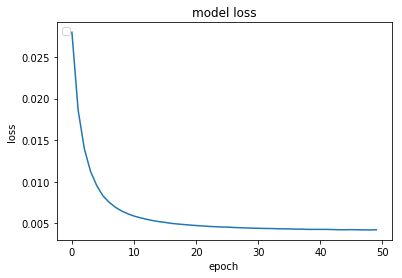

In [0]:
def plot_hist(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.plot(hist.history['loss'])
    #plt.plot(hist.history['val_loss'])

plot_hist(hist)

In [0]:
# Predict new Matrix Interactions, set score zero on visualized games
new_matrix = model.predict(X) * (X == 0)

In [0]:
# converting the reconstructed matrix back to a Pandas dataframe
new_users_items_matrix_df  = pd.DataFrame(new_matrix, 
                                          columns = users_items_matrix_df.columns, 
                                          index   = users_items_matrix_df.index)
new_users_items_matrix_df.head()

content_id,0,1,2,3,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,42,43,44,...,5073,5074,5075,5076,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086,5087,5088,5089,5090,5091,5092,5093,5094,5095,5096,5097,5098,5099,5100,5101,5102,5103,5104,5105,5106,5107,5108,5109,5110,5111,5112
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.002538,-0.004410,0.002690,0.006325,0.001084,-0.000355,-0.006553,-0.000090,-0.001367,-0.004590,0.003449,0.000622,0.004605,-0.002832,0.000995,-0.004201,0.001242,-0.001897,-0.005958,-0.001907,-0.007054,0.003765,0.006247,0.000222,0.015007,0.007771,0.017501,0.001435,0.005674,0.004612,0.000037,0.002660,0.007780,0.000294,-0.018619,-0.014546,-0.004125,0.002970,0.007887,-0.010530,...,-0.000730,0.000647,-0.005998,-0.000698,0.003542,0.002898,-0.002802,-0.003833,-0.005730,0.001561,0.004374,0.003536,-0.005766,0.003419,-0.004029,-0.007521,-0.007730,-0.001388,0.009183,-0.002181,-0.011313,-0.006674,-0.005912,0.005401,0.007003,0.001151,-0.002769,-0.004767,-0.001369,-0.000911,0.010309,0.002452,0.001600,0.003358,-0.003089,-0.022133,-0.004138,0.000407,-0.032897,-0.001521
1,-0.009007,0.002929,-0.007572,0.004783,-0.000437,0.009945,-0.000598,0.014521,0.018887,0.017486,0.005175,-0.009314,0.004790,-0.016644,-0.005094,-0.007607,0.004689,-0.000044,0.007165,0.004821,-0.001708,0.002061,0.005132,0.003803,0.006652,-0.003503,0.013350,0.011369,0.004103,0.007736,0.005562,-0.003671,-0.000119,0.007248,0.027240,-0.004005,-0.014336,0.007852,-0.001739,0.002966,...,0.013572,0.000186,0.001797,-0.007055,0.001958,0.007762,-0.011940,0.004195,-0.002172,-0.012645,0.006752,-0.005949,-0.000872,0.004241,-0.001529,-0.002337,-0.008232,-0.010953,0.000321,0.003496,0.013243,-0.004996,0.008360,-0.000118,-0.005116,-0.001995,-0.004642,0.011170,-0.011159,0.005935,-0.005534,-0.003967,0.009624,0.015951,-0.002125,0.005773,-0.005269,0.001745,0.042978,0.001900
2,0.008934,0.001406,-0.003010,0.008758,-0.004928,0.011253,0.006046,-0.008245,-0.010823,-0.010308,0.001293,0.019140,0.020601,0.002347,0.000824,0.005440,0.007387,-0.001083,0.013443,0.007006,-0.015810,-0.012518,0.037915,-0.004834,0.059080,0.040962,0.054166,0.026267,0.036963,0.002166,-0.006394,-0.010407,-0.012044,-0.006479,0.028622,0.000772,0.004555,0.016269,-0.018450,0.002863,...,0.014337,0.007626,0.001740,0.002505,-0.000320,-0.001427,0.000409,-0.006989,0.020246,-0.003868,0.008476,0.013532,0.010883,0.002153,0.000427,0.002618,-0.000496,-0.006179,0.003061,0.018625,-0.004005,-0.019272,0.004247,0.006871,-0.010476,0.005693,0.000089,-0.000530,-0.002188,0.004348,-0.000766,0.003807,-0.002787,0.028852,0.001802,0.004726,0.006559,-0.008662,-0.028331,0.006713
3,-0.010067,-0.003983,0.000993,0.005062,-0.002280,-0.006243,-0.002243,-0.009871,0.005593,0.001793,0.003536,0.000333,-0.002930,-0.007793,-0.000611,0.005783,0.000679,0.003327,-0.000926,-0.008035,-0.007190,0.000100,-0.002052,0.005091,0.002839,0.003408,0.008558,-0.003222,0.003084,0.004241,0.006930,0.003733,-0.003692,0.005123,-0.022779,-0.001205,-0.004469,0.002417,-0.000516,-0.002051,...,0.002971,0.008445,0.002445,-0.001521,0.005474,-0.000626,-0.007677,0.004740,-0.001801,-0.002014,0.001797,0.001218,-0.000609,-0.007346,-0.003550,0.004725,-0.001843,-0.000113,0.001710,0.005118,-0.013328,0.001044,-0.005023,0.000760,-0.010794,-0.005701,-0.005689,-0.002487,0.006958,-0.003709,0.007111,-0.010371,-0.000790,0.001436,-0.000964,-0.004375,-0.006061,-0.005991,-0.000186,-0.002858
4,-0.006758,-0.001785,-0.003774,0.005072,-0.000203,-0.003007,0.001090,-0.011080,0.003988,-0.004256,0.002283,0.003459,-0.003634,0.000017,-0.005004,0.007096,0.000029,-0.001725,0.001237,-0.000205,-0.004129,-0.007106,-0.004314,0.001711,0.006596,0.002868,0.003641,-0.007523,0.003446,-0.000029,0.003715,0.008005,-0.001985,0.004864,-0.026044,-0.005095,-0.001605,0.002951,0.001051,-0.005394,...,0.011757,0.008164,0.002358,-0.001751,0.007266,-0.003959,-0.006558,0.003277,-0.000382,0.002137,0.000606,-0.001130,0.004873,-0.005940,0.002309,0.

In [0]:
print(new_users_items_matrix_df.values.min(), new_users_items_matrix_df.values.max())

-0.5103312 1.6931839


In [0]:
def recommender_for_user(user_id, interact_matrix, df_content, topn = 10):
    '''
    Recommender Games for UserWarning
    '''
    pred_scores = interact_matrix.loc[user_id].values

    df_scores   = pd.DataFrame({'content_id': list(users_items_matrix_df.columns), 
                               'score': pred_scores})

    df_rec      = df_scores.set_index('content_id')\
                    .join(df_content.set_index('content_id'))\
                    .sort_values('score', ascending=False)\
                    .head(topn)[['score', 'game']]
    
    return df_rec[df_rec.score > 0]

In [0]:
# Games previously purchased by the user
recommender_for_user(
    user_id         = 1011, 
    interact_matrix = users_items_matrix_df, 
    df_content      = df_game)

,score,game
content_id,,
3196,1.0,Portal
4221,1.0,Team Fortress 2
2055,1.0,Half-Life 2
2057,1.0,Half-Life 2 Episode One
2059,1.0,Half-Life 2 Lost Coast


In [0]:
# Recommended User Games
recommender_for_user(
    user_id         = 1011, 
    interact_matrix = new_users_items_matrix_df, 
    df_content      = df_game)

,score,game
content_id,,
2056,0.284071,Half-Life 2 Deathmatch
2058,0.275618,Half-Life 2 Episode Two
978,0.202645,Counter-Strike Source
2062,0.161913,Half-Life Deathmatch Source
2457,0.109037,Left 4 Dead 2
1126,0.104682,Day of Defeat Source
3197,0.104105,Portal 2
2456,0.092345,Left 4 Dead
2064,0.091849,Half-Life Source


In [0]:
# Games previously purchased by the user
recommender_for_user(
    user_id         = 1319, 
    interact_matrix = users_items_matrix_df, 
    df_content      = df_game)

,score,game
content_id,,
173,1.0,Age of Empires II HD Edition
2662,1.0,Medieval II Total War Kingdoms
4331,1.0,The Elder Scrolls V Skyrim - Hearthfire
4329,1.0,The Elder Scrolls V Skyrim - Dawnguard
4626,1.0,Total War ATTILA
1752,1.0,Football Manager 2015
4272,1.0,The Bard's Tale
4631,1.0,Total War SHOGUN 2
4328,1.0,The Elder Scrolls V Skyrim


In [0]:
# Recommended User Games
recommender_for_user(
    user_id         = 1319, 
    interact_matrix = new_users_items_matrix_df, 
    df_content      = df_game)

,score,game
content_id,,
4330,0.261243,The Elder Scrolls V Skyrim - Dragonborn
1328,0.141432,Dota 2
4630,0.132376,Total War ROME II - Emperor Edition
3837,0.129183,Skyrim High Resolution Texture Pack
1490,0.126598,Empire Total War
3792,0.096886,Sid Meier's Civilization V
3793,0.096607,Sid Meier's Civilization V Brave New World
2872,0.081958,Napoleon Total War
1127,0.071265,DayZ
